In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

This notebook is loosely reproduces Section 1.5.5 and 3.2 of [PRML](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) with added details.

# Theory

First, let's state a fact that will be used twice in the follow-up derviation.

\begin{align*}
\int \{a - g(b)\}^2 p(b) db &= \{a - \mathbb{E}[g(b)] \}^2 + \text{var}[g(b)] \\
\end{align*}

where 

* $a$ is constant independent of $b$
* $b$ is a random variable, 
* $g$ is a function of $b$,
* $p(b)$ is a distribution of $b$. It may or may not be a conditional distribution.

### Mean squared error (MSE)

Suppose we have learned a model $f$ from a training datset $\mathcal{D}$. Given a test example with feature vector $\mathbf{x}$ and label $t$, we apply the model to make a prediction $y(\mathbf{x})$ on $\mathbf{x}$. The **squared loss** (aka. squared error) is defined as

$$
L(\mathbf{x}, t) = \{y(\mathbf{x}) - t \}^2
$$

$L(\mathbf{x}, t)$ may also be simply written as $L$ for clarity. 

If we integrate $L$ over the space of features and labels, we obtain the **mean squared error**,

\begin{align*}
\mathbb{E}_{\mathbf{x}, t}[L]
&= \iint L(\mathbf{x}, t) p(\mathbf{x}, t) d\mathbf{x}  dt \\
&= \iint \{y(\mathbf{x}) - t \}^2 p(t|\mathbf{x}) p(\mathbf{x}) d\mathbf{x}  dt \\
\end{align*}


### Decompose MSE into mean squared model bias (MSMB) and noise

Notice that $\int \{y(\mathbf{x}) - t \}^2 p(t|\mathbf{x}) dt$ fits the pattern of the fact stated at the beginging, where

* $a = y(\mathbf{x})$,
* $b = t$,
* $p(b) = p(t|\mathbf{x})$,
* $g(b) = t$, i.e. $g$ is the identity function.

Then,

* $\mathbb{E}[g(b)] = \int t p(t|\mathbf{x}) dt = \mathbb{E}_{t|\mathbf{x}}[t]$.
* $\text{var}[g(b)] = \text{var}_{t|\mathbf{x}}[t]$.

Therefore, 

\begin{align*}
\int \{y(\mathbf{x}) - t \}^2 p(t|\mathbf{x}) dt
&= \{y(\mathbf{x}) - \mathbb{E}_{t|\mathbf{x}}[t] \}^2 + \text{var}_{t|\mathbf{x}}[t]
\end{align*}

Then,

\begin{align*}
\mathbb{E}_{\mathbf{x}, t}[L] = 
&= \int \left[ \{y(\mathbf{x}) - \mathbb{E}_{t|\mathbf{x}}[t] \}^2 + \text{var}_{t|\mathbf{x}}[t] \right ] p(\mathbf{x}) d\mathbf{x} \\
&= \int \{y(\mathbf{x}) - \mathbb{E}_{t|\mathbf{x}}[t] \}^2 p(\mathbf{x}) d\mathbf{x} + \int \text{var}_{t|\mathbf{x}}[t] p(\mathbf{x}) d \mathbf{x}
\end{align*}

which verifies Eq. (1.90) in PRML.

* The base of the integrand in the first term, $y(\mathbf{x}) - \mathbb{E}_{t|\mathbf{x}}[t]$, can be interpreted as a *model bias* because it is specific to a particular model $f$. We name the whole term **mean squared model bias**, where the mean is integrated over all $\mathbf{x}$.
* The integrand of the second term is the inherent variance due to the sampling process that generates $t$, so it is irreducible by improving the model prediction $y(\mathbf{x})$. The whole term is commonly referred to as the **noise**.

Note, we name it model bias instead of just bias because the later term usually refers to a concept related to a bias specific a learning algorithm (to be introduced next) instead of a model in the context of MSE decomposition.

Also, we'd like to emphasize that $y(\mathbf{x}) - \mathbb{E}_{t|\mathbf{x}}[t]$ is different from the so-called residual, which is usually defined is $y(\mathbf{x}) - t$.

### Decompose mean squared model bias into mean squared algorithm bias (MSAB, aka. just bias) and mean algorithm variance (MAV, aka. just variance).

Because the model $f$ is learned from the training dataset $\mathcal{D}$ with a learning algorithm, the prediction $y(\mathbf{x})$ is also a function of $\mathcal{D}$, i.e. $y(\mathbf{x}, \mathcal{D})$. if we treat $\mathcal{D}$ also as a random variable, then we can take the expectation of $L$ over the distribution of $\mathcal{D}$, too,

\begin{align*}
\mathbb{E}_{\mathbf{x}, t, \mathcal{D}}[L]
&= \iint \{y(\mathbf{x}, \mathcal{D}) - \mathbb{E}_{t|\mathbf{x}}[t] \}^2 p(\mathbf{x}) p(\mathcal{D}) d\mathbf{x} d\mathcal{D} + \int \text{var}_{t|\mathbf{x}}[t] p(\mathbf{x}) d \mathbf{x} \\
\end{align*}

Note, the noise term is independent of $\mathcal{D}$.

Then, we see $\int \{ y(\mathbf{x}, \mathcal{D}) - \mathbb{E}_{t|\mathbf{x}}[t] \}^2 p(\mathcal{D}) d\mathcal{D}$ fits the pattern of the fact stated at the beginging, too, where

* $ a = \mathbb{E}_{t|\mathbf{x}}[t]$.
* $ b = \mathcal{D}$.
* $ g(b) = y(\mathbf{x}, \mathcal{D})$
* $ p(b) = p(\mathcal{D})$

Then, 

* $\mathbb{E}[g(b)] = \int y(\mathbf{x}, \mathcal{D}) p(\mathcal{D}) d\mathcal{D} = \mathbb{E}_{\mathcal{D}}[y(\mathbf{x}, \mathcal{D})]$
* $\text{var}[g(b)] = \text{var}_\mathcal{D}[y(\mathbf{x}, \mathcal{D})]$

Therefore,

\begin{align*}
\int \{ y(\mathbf{x}, \mathcal{D}) - \mathbb{E}_{t|\mathbf{x}}[t] \}^2 p(\mathcal{D}) d\mathcal{D}
&= \{ \mathbb{E}_{t|\mathbf{x}}[t] - \mathbb{E}_\mathcal{D}[y(\mathbf{x}, D)] \}^2 + \text{var}_\mathcal{D}[y(\mathbf{x}, D)]
\end{align*}


Then,

\begin{align*}
\mathbb{E}_{\mathbf{x}, t, \mathcal{D}}[L]
&= \int \{ \mathbb{E}_{t|\mathbf{x}}[t] - \mathbb{E}_\mathcal{D}[y(\mathbf{x}, D)] \}^2 + \text{var}_\mathcal{D}[y(\mathbf{x}, D)] p(\mathbf{x}) d\mathbf{x} + \int \text{var}_{t|\mathbf{x}}[t] p(\mathbf{x}) d \mathbf{x} \\
&= \color{red}{\int \{ \mathbb{E}_\mathcal{D}[y(\mathbf{x}, D)] - \mathbb{E}_{t|\mathbf{x}}[t] \}^2 p(\mathbf{x}) d \mathbf{x} }
+ \color{blue}{\int \text{var}_\mathcal{D}[y(\mathbf{x}, D)] p(\mathbf{x}) d\mathbf{x} }
+ \color{green}{ \int \text{var}_{t|\mathbf{x}}[t] p(\mathbf{x}) d \mathbf{x}}
\end{align*}

which verifies Eq. (3.41) in PRML.


* in base of the integrand of the first term of the second equality, I reversed the order of $\mathbb{E}_{t|\mathbf{x}}[t]$ and $\mathbb{E}_\mathcal{D}[y(\mathbf{x}, D)]$ to be more consistent with that in model bias derived above.

Note,

* the base of the integrand in the first term (colored red) can be interpreted as a algorithm bias because it is specific to a learning algorithm. We name the whole term **mean squared algorithm bias**, which is also commonly known as **(bias)<sup>2</sup>**, But we find (bias)<sup>2</sup> confusing because it ignores the integration part.
* the second term (colored blue) is **mean algorithm variance**, which is also commonly known as just **variance**.
* the third term (colored green) is the noise from the data generating process.

In summary, the MSE can be decomposed into mean squared model bias (MSMB) and noise, where MSMB can be further decomposed into mean squared algorithm bias (MSAB) and mean algorithm variance (MAV), so

$$
MSE = MSAB + MAV + \text{noise}
$$

which is also colloquially known as

$$
MSE = \text{bias}^2 + \text{variance} + \text{noise}
$$

# Demo

We will use synthetic data to demonstrate how the three terms can be calculated in practice.

More concretely:

* Use polynomal functions with different degrees as the learning algorithms. Each degree correspond to one algorithm.
* Sample a number of training data sets, corresponding to different $\mathcal{D}$s. The features are sampled from the real line, and the label is generated from  $sin(x)$ with added Gaussian noise.
* Sample one testing data set.
* For each learning algorithm and each training set, fit a model.
* Make predictions with all the models on the test set.
* Calculate various terms based on derivations from the Theory part. Integrations will be approximated with averages.


We will use variable names consistent with symbols from the Theory part.

In [2]:
from IPython.display import HTML, Image, display

display(
    HTML(
        data="""
<style>
   div#notebook-container    { width: 100%; }
   div#menubar-container     { width: 100%; }
   div#maintoolbar-container { width: 100%; }
</style>
"""
    )
)

In [3]:
from typing import List, Tuple

import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rng = np.random.default_rng(12345)

In [5]:
def sample_features(size: int) -> np.ndarray:
    return rng.uniform(size=size) * 3 * np.pi

In [6]:
def true_func(x) -> np.ndarray:
    return np.sin(x)

In [7]:
def sample_noise(size: int) -> np.ndarray:
    """Samples Gaussian noise."""
    return rng.normal(scale=0.3, size=size)

In [8]:
def sample_train_set(size: int) -> pd.DataFrame:
    xs = sample_features(size)
    
    return pd.DataFrame(
        {
            "x": xs,
            "t": true_func(xs) + sample_noise(len(xs)),
        }
    )

In [9]:
def make_train_sets(num_sets: int, size_per_set: int) -> pd.DataFrame:
    """Makes training datasets.
    
    data set will be identified via the set_id column.
    """
    train_sets = []

    for i in range(num_sets):
        train_sets.append(sample_train_set(size=size_per_set).assign(set_id=i))

    return pd.concat(train_sets)

In [10]:
def make_test_set(size: int) -> pd.DataFrame:
    """Makes test dataset.
    
    The examples are identified via the example_id column.
    """
    xs = sample_features(size=size)
    return pd.DataFrame(
        {
            "example_id": np.arange(len(xs)),
            "x": xs,
            "t": true_func(xs) + sample_noise(len(xs)),
            "expected_t": true_func(xs),
        }
    )

In [11]:
class PolynomialRegressor:
    def __init__(self, degree: int) -> None:
        self.degree = degree
        
    def fit(self, xs: pd.Series, ys: pd.Series) -> None:
        self.weights = np.polyfit(xs, ys, deg=self.degree)
        
    def predict(self, xs: pd.Series) -> pd.Series:
        out = np.zeros_like(xs)
        for i, ws in enumerate(self.weights[::-1]):
            out += ws * xs ** i
        return out

In [12]:
def fit_and_predict(df_tr: pd.DataFrame, df_te: pd.DataFrame, degrees:List[int]) -> pd.DataFrame:
    """
    Args:
        df_tr: training set.
        df_te: testing set.
        degress: the number of degrees to use. 
            This number is also the number of learning algorithms involved, 
            and the number of models to be trained.
    """
    dfs = []
    for set_id in sorted(df_tr.set_id.unique()):
        for degree in degrees:
            _df = df_tr.loc[lambda df: df.set_id == set_id]

            model = PolynomialRegressor(degree=degree)

            model.fit(_df["x"], _df["t"])

            dfs.append(
                df_te.assign(
                    y=lambda df: model.predict(df["x"]),
                    set_id=set_id,
                    degree=degree,
                )
            )

    return pd.concat(dfs)

In [13]:
df_train = make_train_sets(num_sets=10, size_per_set=25)
df_test = make_test_set(size=50)

In [26]:
df_preds = fit_and_predict(df_train, df_test, degrees=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualize the predictions

Visualize test set, which is the same for all set_id and degree values, so just sample one set.

In [27]:
alt.Chart(
    df_preds.loc[lambda df: (df.set_id == 1) & (df.degree == 2)], width=300, height=250
).mark_circle().encode(x="x", y="t")

alt.Chart(...)

Visualize predictions from models of different degrees trained on different datasets.

In [28]:
alt.Chart(df_preds, width=200, height=150).mark_line().encode(
    x="x", y="y", color="set_id:N"
).facet(facet="degree:O", columns=5).resolve_scale(y="independent")

alt.FacetChart(...)

Note,

* when degree = 0, the prediction is a constant.
* when degree = 1, the polynomial is a linear line.
* when degree = 2, the polynomial is a parabola.

### Quantify algorithm bias and variance

In [29]:
def calc_avg_bias_squared(dfp: pd.DataFrame) -> float:
    # group by example_id is effectively group by training sets ($\mathcal{D}$)
    y_avg = dfp.groupby("example_id")['y'].mean()
    
    # note, expected_t of independent of the training sets, so we can calculate it from the model trained on the first training set.
    expected_t = dfp.loc[lambda df: df.set_id == 0]["expected_t"]
    
    total = (y_avg - expected_t) ** 2
    
    # this mean is over test examples.
    return total.mean()

In [30]:
def calc_avg_variance(dfp: pd.DataFrame) -> float:
    # Note, the var is averaged over training sets, while the mean is averaged over examples.
    return dfp.groupby("example_id")["y"].var().mean()

In [31]:
def calc_avg_noise(dfp: pd.DataFrame) -> float:
    # Note, noise is independent of the training sets, so we can calculate it from the model trained on the first training set.
    df0 = dfp.loc[lambda df: df.set_id == 0]
    return (df0.t - df0.expected_t).var()

In [32]:
def calc_mse(dfp: pd.DataFrame) -> float:
    return ((dfp.y - dfp.t) ** 2).mean()

In [33]:
def calc_stats_by_book(dfp: pd.DataFrame) -> pd.Series:
    """Calculates stats about a learning algorithm.

    The stats are calculated based on the predictions from
    a model learning using the corresponding learning algorithm.

    Args:
        dfp: the predictions of models training on different datasets (identified by set_id)
        on the same set of examples (identified by example_id).
    """

    out = pd.Series(
        dict(
            avg_bias_squared=dfp.pipe(calc_avg_bias_squared),
            avg_variance=dfp.pipe(calc_avg_variance),
            avg_noise=dfp.pipe(calc_avg_noise),
        ),
    )
    out["mse_by_sum"] = out.sum()
    out['mse'] = dfp.pipe(calc_mse)
    
    return out

In [34]:
df_stats = df_preds.groupby('degree').apply(calc_stats_by_book)
df_stats

,avg_bias_squared,avg_variance,avg_noise,mse_by_sum,mse
degree,,,,,
0,0.473417,0.008075,0.109453,0.590945,0.608427
1,0.474781,0.028610,0.109453,0.612843,0.628409
2,0.334588,0.069533,0.109453,0.513573,0.510708
3,0.352418,0.272875,0.109453,0.734746,0.709636
4,0.027839,0.052794,0.109453,0.190085,0.165411
5,0.044867,0.148976,0.109453,0.303296,0.274265
6,0.003894,0.088280,0.109453,0.201626,0.190682
7,0.105132,1.913967,0.109453,2.128552,1.953153
8,0.257097,3.502435,0.109453,3.868984,3.503940


In [35]:
df_plot = (
    df_stats.stack()
    .rename_axis(index={None: "type"})
    .to_frame(name="value")
    .reset_index()
)

In [40]:
alt.Chart(df_plot, width=200, height=150).mark_line(point=True).encode(
    x="degree", y="value"
).facet(facet="type").resolve_scale(y='independent')

alt.FacetChart(...)

Compare the MSE and that inferred by summing individual terms by checking the fractions. The two should be approximately the same.

In [41]:
alt.Chart(
    df_stats.reset_index().assign(fraction=lambda df: (df.mse_by_sum - df.mse) / df.mse)
).mark_circle().encode(x="mse", y="fraction", color = "degree:O")

alt.Chart(...)

That mse_by sum is over 10% higher than mse seems high, but I am unclear the theoretical boundary yet.

### How is bias/variance linked to underfitting/overfitting?

This is the question that motivated me to go through the derivations in details.

When we see a chart like below (from my own drawing at [here](https://docs.google.com/drawings/d/1-MADDZbpcDvAiE2VqLaBNRcVXRU4Od2e39iqeu4K1h0/edit)),

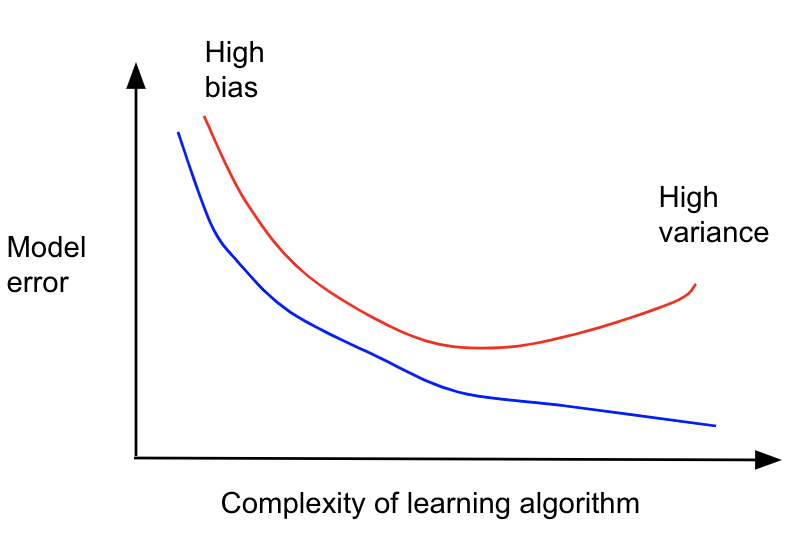

where the X axis indicates the complexity of a learning algorithm, e.g. training a neural network with the same model architecture but different number of epochs are considered different learning algorithms; and the Y axis indicates the error of a model trained with the corresponding learning algorithm.

We say in the left region, the model is underfitting with both training and validation error high; in the right region, the model is overfitting with low training error but high validation error.

According to the decomposition of MSE,

$$
MSE = \color{red}{\int \{ \mathbb{E}_\mathcal{D}[y(\mathbf{x}, D)] - \mathbb{E}_{t|\mathbf{x}}[t] \}^2 p(\mathbf{x}) d \mathbf{x} }
+ \color{blue}{\int \text{var}_\mathcal{D}[y(\mathbf{x}, D)] p(\mathbf{x}) d\mathbf{x} }
+ \color{green}{ \int \text{var}_{t|\mathbf{x}}[t] p(\mathbf{x}) d \mathbf{x}}
$$

For an algorithm with high bias, by definition it means the algorithm cannot produce models that make predictions close to $\mathbb{E}_{t|\mathbf{x}}[t]$, so it is equvalent to saying that models trained using this algorithm cannot fit the data. Therefore, such models can cause both training and validation error to be high, which is the symptom of underfitting.

For an algorithm with high variance, by defintion it means that models produced with the algorithm **makes predictions that vary a lot depending on the training set** for a given test example, which means the model is fitting to the noise of a particular data set that does not generalize from data to data. Therefore, such models can cause the training error to be low but validation error to get high, which is the symptom of overfitting.

Therefore, high bias/high variance is one way to explain underfitting/overfitting, but they are not equivalent. **Underfitting and overfitting are model-level concepts and mutually exclusive, while high bias and high variance are (learning) algorithm-level concepts and NOT mutually exclusive**. For example, an algorithm can have both high bias and high variance as shown at at https://stackoverflow.com/a/32185102/856804.

Also, note the variance term does not even involve the conditional expectation $\mathbb{E}_{t|\mathbf{x}}[t]$, so high variance alone does not necessarily mean low bias, it does not imply the training error is low, either.

As https://www.cs.cmu.edu/~wcohen/10-601/bias-variance.pdf put it,

> Bias/Variance is a Way to Understand Overfitting and Underfitting

# Appendices

### Prove $\int \{a - g(b)\}^2 p(b) db = \{a - \mathbb{E}[g(b)] \}^2 + \text{var}[g(b)] $

\begin{align}
\int \{a - g(b) \}^2 p(b) db
&= \int (a - \mathbb{E}[g] + \mathbb{E}[g] - g)^2 p(b) db \\
&= \int \Big[(a - \mathbb{E}[g])^2 + 2 (a - \mathbb{E}[g])(\mathbb{E}[g] - g) + (\mathbb{E}[g] - g)^2 \Big ] p(b) db \\
&= (a - \mathbb{E}[g])^2  + \int \left[ 2 (a - \mathbb{E}[g])(\mathbb{E}[g] - g) + (\mathbb{E}[g] - g)^2 \right ] p(b) db \\
&= (a - \mathbb{E}[g])^2  + \int \left[ 2 a \mathbb{E}[g] - 2\mathbb{E}[g]^2 - 2ag + 2g\mathbb{E}[g] + \mathbb{E}[g]^2 - 2\mathbb{E}[g]g + g^2 \right] p(b) db \\
&= (a - \mathbb{E}[g])^2  + \int \left[ 2 a \mathbb{E}[g] - \mathbb{E}[g]^2 - 2ag + g^2 \right] p(b) db \\
&= (a - \mathbb{E}[g])^2  + 2 a \mathbb{E}[g] - \mathbb{E}[g]^2 - 2a\mathbb{E}[g] + \mathbb{E}[b^2] \\
&= (a - \mathbb{E}[g])^2 - \mathbb{E}[g]^2 + \mathbb{E}[g^2] \\
&= (a - \mathbb{E}[g])^2 + \text{var}[g] \\
\end{align}

Note,

* we write $g(b)$ as $g$ for clarity
* $\mathbb{E}[g(b)] = \int g(b) p(b) db $ is independent of $b$.
* in the last equality, by [definition of variance](https://en.wikipedia.org/wiki/Variance), $\text{var}[g] = \mathbb{E}[g^2] - \mathbb{E}[g]^2$.

### Reproduced derivation in https://homes.cs.washington.edu/~pedrod/papers/mlc00a.pdf

Context:

* multiple datasets (D) of a given size
* one example ($x$) for evaluation
* The true function $x \rightarrow t$ is non-deterministic, meaning the same $x$ can lead to multiple $t$, which is common in ML. E.g. when predicting prep time, cooking the same order again will take different times.
* So for a given $x$, the best prediction would be $y^* = \mathbb{E}_t[t|x] = \mathbb{E}_t[t] = \int t p(t|x) dt$, but since we're talking about one $x$, the conditional is obvious, we can ignore in the equation, simplifying it to $y^* = \mathbb{E}_t[t] = \int t p(t) dt$

With a general loss function $L$, then $y^* = \arg \min_y \mathbb{E}_t[L(t, y)]$

\begin{align*}
\mathbb{E}_{D, t}[(y - t)^2]
&= \mathbb{E}_{D, t}\left[(y - \mathbb{E}_D[y] + \mathbb{E}_D[y] - t)^2 \right] \\
&= \mathbb{E}_{D, t}\left[(y - \mathbb{E}_D[y])^2 + 2(y - \mathbb{E}_D[y])(\mathbb{E}_D[y] - t) + (\mathbb{E}_D[y] - t)^2 \right] \\
&= \mathbb{E}_{D, t}\left[(y - \mathbb{E}_D[y])^2 \right] + \mathbb{E}_{D, t}\left[ 2(y - \mathbb{E}_D[y])(\mathbb{E}_D[y] - t) \right] + \mathbb{E}_{D, t}\left[(\mathbb{E}_D[y] - t)^2 \right] \\
&= \mathbb{E}_{D}\left[(y - \mathbb{E}_D[y])^2 \right] + \mathbb{E}_{D, t}\left[(\mathbb{E}_D[y] - t)^2 \right] \\
&= \mathbb{E}_{D}\left[(y - \mathbb{E}_D[y])^2 \right] + \mathbb{E}_{D, t}\left[(\mathbb{E}_D[y] - \mathbb{E}_t[t] + \mathbb{E}_t[t] - t)^2 \right] \\
&= \mathbb{E}_{D}\left[(y - \mathbb{E}_D[y])^2 \right] + \mathbb{E}_{D, t}\left[(\mathbb{E}_D[y] - \mathbb{E}_t[t])^2  \right ] + \mathbb{E}_{t}\left[(\mathbb{E}_t[t] - t)^2 \right] \\
&= \mathbb{E}_{D}\left[(y - \mathbb{E}_D[y])^2 \right] + (\mathbb{E}_D[y] - \mathbb{E}_t[t])^2  + \mathbb{E}_{t}\left[(\mathbb{E}_t[t] - t)^2 \right] \\
&= \mathbb{E}_{D}\left[(y - \mathbb{E}_D[y])^2 \right] + (\mathbb{E}_D[y] - \mathbb{E}_t[t])^2  + \mathbb{E}_{\epsilon}\left[\epsilon^2 \right] \\
&= var + bias^2 + error
\end{align*}

In contrast to the Theory part, this derivation subtracts and adds $\mathbb{E}_{\mathcal{D}}[y]$ directly, which may be more straightforward. Note this derivation is focused on only one test example, and not integrated over $\mathbf{x}$ yet.